In [270]:
#Importing all important packages that will be used in this project. 
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import os
import tabula
from tabula import read_pdf
import PyPDF2
import requests
import numpy as np
import pdfrw
from pdfrw import PdfReader, PdfWriter
import spacy 
import autocorrect
from spacy import displacy
import re
import string
import warnings

In [271]:
pdf_violence_india = r"/Users/bhargavithakur/Downloads/CII_2021Volume 1.pdf"

In [272]:
df_violence_india = tabula.read_pdf(pdf_violence_india , pages = '260')
df_violence_state = df_violence_india[0]
df_violence_state

,Unnamed: 0,Unnamed: 1,Murder with Rape/Gang,Dowry Deaths (Sec. 304B,Abetment to Suicide of
0,SL State/UT,NaN,Rape,IPC),Women (Sec. 305/306 IPC)
1,NaN,NaN,I V R,I V R,I V R
2,[1] [2],NaN,[3] [4] [5],[6] [7] [8],[9] [10] [11]
3,STATES:,NaN,NaN,NaN,NaN
4,1 Andhra Pradesh,NaN,2 2 0.0,108 109 0.4,397 410 1.5
5,2 Arunachal Pradesh,NaN,0 0 0.0,0 0 0.0,1 1 0.1
6,3 Assam,NaN,46 47 0.3,198 198 1.1,82 82 0.5
7,4 Bihar,NaN,0 0 0.0,1000 1000 1.7,5 5 0.0
8,5 Chhattisgarh,NaN,8 9 0.1,65 65 0.4,125 125 0.8
9,6 Goa,NaN,0 0 0.0,0 0 0.0,0 0 0.0


In [273]:
df_violence_state = df_violence_state.drop(columns=['Unnamed: 1'])

In [274]:
df_violence_state = df_violence_state.drop([0, 3])


In [275]:
df_violence_state.columns

Index(['Unnamed: 0', 'Murder with Rape/Gang', 'Dowry Deaths (Sec. 304B',
       'Abetment to Suicide of'],
      dtype='object')

In [276]:
df_violence_state['Murder'] = df_violence_state['Murder with Rape/Gang']
df_violence_state['Dowry_Deaths'] = df_violence_state['Dowry Deaths (Sec. 304B']
df_violence_state.columns

Index(['Unnamed: 0', 'Murder with Rape/Gang', 'Dowry Deaths (Sec. 304B',
       'Abetment to Suicide of', 'Murder', 'Dowry_Deaths'],
      dtype='object')

In [277]:
df_violence_state['Abetment_to_Suicide'] = df_violence_state['Abetment to Suicide of']

In [278]:
df_violence_state['State_Name'] = df_violence_state['Unnamed: 0']

In [280]:
df_violence_state = df_violence_state.drop(columns=['Murder with Rape/Gang' ,'Dowry Deaths (Sec. 304B',
       'Abetment to Suicide of' ])

In [281]:
df_violence_state['Murder'] = df_violence_state['Murder'].astype(str)

In [282]:
df_violence_state[['I_m','V_m' , 'R_m']] = df_violence_state.Murder.str.split(" ",expand=True)

In [283]:
df_violence_state[['I_d','V_d' , 'R_d']] = df_violence_state.Dowry_Deaths.str.split(" ",expand=True)

In [284]:
df_violence_state[['I_s','V_s' , 'R_s']] = df_violence_state.Abetment_to_Suicide.str.split(" ",expand=True)

In [285]:
df_violence_state = df_violence_state.drop(columns=['Murder', 'Dowry_Deaths', 'Abetment_to_Suicide'])

In [286]:
df_violence_state

,Unnamed: 0,State_Name,I_m,V_m,R_m,I_d,V_d,R_d,I_s,V_s,R_s
1,NaN,NaN,I,V,R,I,V,R,I,V,R
2,[1] [2],[1] [2],[3],[4],[5],[6],[7],[8],[9],[10],[11]
4,1 Andhra Pradesh,1 Andhra Pradesh,2,2,0.0,108,109,0.4,397,410,1.5
5,2 Arunachal Pradesh,2 Arunachal Pradesh,0,0,0.0,0,0,0.0,1,1,0.1
6,3 Assam,3 Assam,46,47,0.3,198,198,1.1,82,82,0.5
7,4 Bihar,4 Bihar,0,0,0.0,1000,1000,1.7,5,5,0.0
8,5 Chhattisgarh,5 Chhattisgarh,8,9,0.1,65,65,0.4,125,125,0.8
9,6 Goa,6 Goa,0,0,0.0,0,0,0.0,0,0,0.0
10,7 Gujarat,7 Gujarat,7,7,0.0,11,11,0.0,384,384,1.2
11,8 Haryana,8 Haryana,11,11,0.1,275,275,2.0,201,205,1.4


In [287]:
df_violence_state = df_violence_state.drop([1, 2])

In [288]:
df_violence_state = df_violence_state.drop([33, 36, 38 , 32, 44, 45])

In [289]:
df_violence_state

,Unnamed: 0,State_Name,I_m,V_m,R_m,I_d,V_d,R_d,I_s,V_s,R_s
4,1 Andhra Pradesh,1 Andhra Pradesh,2,2,0.0,108,109,0.4,397,410,1.5
5,2 Arunachal Pradesh,2 Arunachal Pradesh,0,0,0.0,0,0,0.0,1,1,0.1
6,3 Assam,3 Assam,46,47,0.3,198,198,1.1,82,82,0.5
7,4 Bihar,4 Bihar,0,0,0.0,1000,1000,1.7,5,5,0.0
8,5 Chhattisgarh,5 Chhattisgarh,8,9,0.1,65,65,0.4,125,125,0.8
9,6 Goa,6 Goa,0,0,0.0,0,0,0.0,0,0,0.0
10,7 Gujarat,7 Gujarat,7,7,0.0,11,11,0.0,384,384,1.2
11,8 Haryana,8 Haryana,11,11,0.1,275,275,2.0,201,205,1.4
12,9 Himachal Pradesh,9 Himachal Pradesh,0,0,0.0,2,2,0.1,51,51,1.4
13,10 Jharkhand,10 Jharkhand,20,22,0.1,281,281,1.5,40,40,0.2


In [290]:
import pandas as pd


In [291]:
df_state_names

,state_name
0,Andhra Pradesh
1,Arunachal Pradesh
2,Assam
3,Bihar
4,Chhattisgarh
5,Goa
6,Gujarat
7,Haryana
8,Himachal Pradesh
9,Jharkhand


In [292]:
col_list = df_state_names.state_name.values.tolist()

In [293]:
df_violence_state['Name_State'] = col_list
  

In [294]:
df_violence_state.drop(columns=['Unnamed: 0' , 'State_Name'])

,I_m,V_m,R_m,I_d,V_d,R_d,I_s,V_s,R_s,Name_State
4,2,2,0.0,108,109,0.4,397,410,1.5,Andhra Pradesh
5,0,0,0.0,0,0,0.0,1,1,0.1,Arunachal Pradesh
6,46,47,0.3,198,198,1.1,82,82,0.5,Assam
7,0,0,0.0,1000,1000,1.7,5,5,0.0,Bihar
8,8,9,0.1,65,65,0.4,125,125,0.8,Chhattisgarh
9,0,0,0.0,0,0,0.0,0,0,0.0,Goa
10,7,7,0.0,11,11,0.0,384,384,1.2,Gujarat
11,11,11,0.1,275,275,2.0,201,205,1.4,Haryana
12,0,0,0.0,2,2,0.1,51,51,1.4,Himachal Pradesh
13,20,22,0.1,281,281,1.5,40,40,0.2,Jharkhand


In [295]:
import geopandas as gpd

In [296]:
india_shape_df = gpd.read_file('/Users/bhargavithakur/Downloads/data/IND_adm1.shp')
india_shape_df

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,105,IND,India,1,Andaman and Nicobar,IN.AN,0,None,Union Territor,Union Territory,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,IN.AP,0,None,State,State,None,None,"MULTIPOLYGON (((80.19264 13.52070, 80.19264 13..."
2,105,IND,India,3,Arunachal Pradesh,IN.AR,0,None,State,State,None,Agence de la Frontière du Nord-Est(French-obso...,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,IN.AS,0,None,State,State,None,None,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,IN.BR,0,None,State,State,None,None,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."
5,105,IND,India,6,Chandigarh,IN.CH,0,None,Union Territor,Union Territory,None,None,"POLYGON ((76.80293 30.67548, 76.79437 30.66932..."
6,105,IND,India,7,Chhattisgarh,IN.CT,0,None,State,State,None,None,"POLYGON ((83.32760 24.09965, 83.34575 24.09707..."
7,105,IND,India,8,Dadra and Nagar Haveli,IN.DN,0,None,Union Territor,Union Territory,None,DAdra et Nagar Haveli|Dadra e Nagar Haveli,"POLYGON ((73.02468 20.09630, 73.01955 20.10502..."
8,105,IND,India,9,Daman and Diu,IN.DD,0,None,Union Territor,Union Territory,None,None,"MULTIPOLYGON (((72.86014 20.47096, 72.86340 20..."
9,105,IND,India,10,Goa,IN.GA,0,None,State,State,None,Gôa,"MULTIPOLYGON (((73.78181 15.35569, 73.78181 15..."


In [297]:
india_shape_df.NAME_1.unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'NCT of Delhi', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [298]:
df_violence_state.Name_State.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Maharashtra',
       'Madhya Pradesh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura',
       'Telangana', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal',
       'Andaman & Nicobar', 'Chandigarh',
       'Dadra & Nagar Haveli and Daman & Diu ', 'Delhi',
       'Jammu & Kashmir', 'Ladakh', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [299]:
df_violence_state.replace("Andaman & Nicobar", "Andaman and Nicobar")

,Unnamed: 0,State_Name,I_m,V_m,R_m,I_d,V_d,R_d,I_s,V_s,R_s,Name_State
4,1 Andhra Pradesh,1 Andhra Pradesh,2,2,0.0,108,109,0.4,397,410,1.5,Andhra Pradesh
5,2 Arunachal Pradesh,2 Arunachal Pradesh,0,0,0.0,0,0,0.0,1,1,0.1,Arunachal Pradesh
6,3 Assam,3 Assam,46,47,0.3,198,198,1.1,82,82,0.5,Assam
7,4 Bihar,4 Bihar,0,0,0.0,1000,1000,1.7,5,5,0.0,Bihar
8,5 Chhattisgarh,5 Chhattisgarh,8,9,0.1,65,65,0.4,125,125,0.8,Chhattisgarh
9,6 Goa,6 Goa,0,0,0.0,0,0,0.0,0,0,0.0,Goa
10,7 Gujarat,7 Gujarat,7,7,0.0,11,11,0.0,384,384,1.2,Gujarat
11,8 Haryana,8 Haryana,11,11,0.1,275,275,2.0,201,205,1.4,Haryana
12,9 Himachal Pradesh,9 Himachal Pradesh,0,0,0.0,2,2,0.1,51,51,1.4,Himachal Pradesh
13,10 Jharkhand,10 Jharkhand,20,22,0.1,281,281,1.5,40,40,0.2,Jharkhand


In [217]:
df_violence_state.replace("Dadra & Nagar Haveli and Daman & Diu" , "Daman and Diu" )

,Unnamed: 0,State_Name,I_m,V_m,R_m,I_d,V_d,R_d,I_s,V_s,R_s,Name_State
4,1 Andhra Pradesh,1 Andhra Pradesh,2,2,0.0,108,109,0.4,397,410,1.5,Andhra Pradesh
5,2 Arunachal Pradesh,2 Arunachal Pradesh,0,0,0.0,0,0,0.0,1,1,0.1,Arunachal Pradesh
6,3 Assam,3 Assam,46,47,0.3,198,198,1.1,82,82,0.5,Assam
7,4 Bihar,4 Bihar,0,0,0.0,1000,1000,1.7,5,5,0.0,Bihar
8,5 Chhattisgarh,5 Chhattisgarh,8,9,0.1,65,65,0.4,125,125,0.8,Chhattisgarh
9,6 Goa,6 Goa,0,0,0.0,0,0,0.0,0,0,0.0,Goa
10,7 Gujarat,7 Gujarat,7,7,0.0,11,11,0.0,384,384,1.2,Gujarat
11,8 Haryana,8 Haryana,11,11,0.1,275,275,2.0,201,205,1.4,Haryana
12,9 Himachal Pradesh,9 Himachal Pradesh,0,0,0.0,2,2,0.1,51,51,1.4,Himachal Pradesh
13,10 Jharkhand,10 Jharkhand,20,22,0.1,281,281,1.5,40,40,0.2,Jharkhand


In [300]:
df_violence_state['NAME_1'] = df_violence_state['Name_State']

In [301]:
merged = df_violence_state.merge(india_shape_df, on='NAME_1')

In [302]:
merged.head()


,Unnamed: 0,State_Name,I_m,V_m,R_m,I_d,V_d,R_d,I_s,V_s,...,NAME_0,ID_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,1 Andhra Pradesh,1 Andhra Pradesh,2,2,0.0,108,109,0.4,397,410,...,India,2,IN.AP,0,None,State,State,None,None,"MULTIPOLYGON (((80.19264 13.52070, 80.19264 13..."
1,2 Arunachal Pradesh,2 Arunachal Pradesh,0,0,0.0,0,0,0.0,1,1,...,India,3,IN.AR,0,None,State,State,None,Agence de la Frontière du Nord-Est(French-obso...,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
2,3 Assam,3 Assam,46,47,0.3,198,198,1.1,82,82,...,India,4,IN.AS,0,None,State,State,None,None,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
3,4 Bihar,4 Bihar,0,0,0.0,1000,1000,1.7,5,5,...,India,5,IN.BR,0,None,State,State,None,None,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."
4,5 Chhattisgarh,5 Chhattisgarh,8,9,0.1,65,65,0.4,125,125,...,India,7,IN.CT,0,None,State,State,None,None,"POLYGON ((83.32760 24.09965, 83.34575 24.09707..."


In [303]:
merged.columns

Index(['Unnamed: 0', 'State_Name', 'I_m', 'V_m', 'R_m', 'I_d', 'V_d', 'R_d',
       'I_s', 'V_s', 'R_s', 'Name_State', 'NAME_1', 'ID_0', 'ISO', 'NAME_0',
       'ID_1', 'HASC_1', 'CCN_1', 'CCA_1', 'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1',
       'VARNAME_1', 'geometry'],
      dtype='object')

In [304]:
merged = merged.drop(columns = ['Unnamed: 0', 'State_Name' , 'Name_State' , 'ID_0', 'ISO', 'NAME_0',
       'ID_1', 'HASC_1', 'CCN_1', 'CCA_1', 'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1' , 'VARNAME_1'])

In [305]:
merged

,I_m,V_m,R_m,I_d,V_d,R_d,I_s,V_s,R_s,NAME_1,geometry
0,2,2,0.0,108,109,0.4,397,410,1.5,Andhra Pradesh,"MULTIPOLYGON (((80.19264 13.52070, 80.19264 13..."
1,0,0,0.0,0,0,0.0,1,1,0.1,Arunachal Pradesh,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
2,46,47,0.3,198,198,1.1,82,82,0.5,Assam,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
3,0,0,0.0,1000,1000,1.7,5,5,0.0,Bihar,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."
4,8,9,0.1,65,65,0.4,125,125,0.8,Chhattisgarh,"POLYGON ((83.32760 24.09965, 83.34575 24.09707..."
5,0,0,0.0,0,0,0.0,0,0,0.0,Goa,"MULTIPOLYGON (((73.78181 15.35569, 73.78181 15..."
6,7,7,0.0,11,11,0.0,384,384,1.2,Gujarat,"MULTIPOLYGON (((72.84597 20.76320, 72.84597 20..."
7,11,11,0.1,275,275,2.0,201,205,1.4,Haryana,"POLYGON ((76.83715 30.87887, 76.85243 30.87069..."
8,0,0,0.0,2,2,0.1,51,51,1.4,Himachal Pradesh,"POLYGON ((76.80276 33.23666, 76.80630 33.23623..."
9,20,22,0.1,281,281,1.5,40,40,0.2,Jharkhand,"POLYGON ((87.59989 25.31466, 87.60688 25.31138..."


In [306]:
from urllib.request import urlopen
import json
import plotly.express as px

In [307]:
import pandas as pd
import matplotlib.pyplot as plt #if using matplotlib
import plotly.express as px #if using plotly
import geopandas as gpd

In [308]:
merged.columns

Index(['I_m', 'V_m', 'R_m', 'I_d', 'V_d', 'R_d', 'I_s', 'V_s', 'R_s', 'NAME_1',
       'geometry'],
      dtype='object')

In [309]:
merged = merged.astype({'R_s':'float'})

In [311]:
merged

,I_m,V_m,R_m,I_d,V_d,R_d,I_s,V_s,R_s,NAME_1,geometry
0,2,2,0.0,108,109,0.4,397,410,1.5,Andhra Pradesh,"MULTIPOLYGON (((80.19264 13.52070, 80.19264 13..."
1,0,0,0.0,0,0,0.0,1,1,0.1,Arunachal Pradesh,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
2,46,47,0.3,198,198,1.1,82,82,0.5,Assam,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
3,0,0,0.0,1000,1000,1.7,5,5,0.0,Bihar,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."
4,8,9,0.1,65,65,0.4,125,125,0.8,Chhattisgarh,"POLYGON ((83.32760 24.09965, 83.34575 24.09707..."
5,0,0,0.0,0,0,0.0,0,0,0.0,Goa,"MULTIPOLYGON (((73.78181 15.35569, 73.78181 15..."
6,7,7,0.0,11,11,0.0,384,384,1.2,Gujarat,"MULTIPOLYGON (((72.84597 20.76320, 72.84597 20..."
7,11,11,0.1,275,275,2.0,201,205,1.4,Haryana,"POLYGON ((76.83715 30.87887, 76.85243 30.87069..."
8,0,0,0.0,2,2,0.1,51,51,1.4,Himachal Pradesh,"POLYGON ((76.80276 33.23666, 76.80630 33.23623..."
9,20,22,0.1,281,281,1.5,40,40,0.2,Jharkhand,"POLYGON ((87.59989 25.31466, 87.60688 25.31138..."


<class 'geopandas.geodataframe.GeoDataFrame'>


<AxesSubplot:>

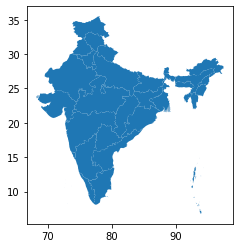

In [312]:

states_and_ut = india_shape_df['NAME_1'].tolist()
print(type(india_shape_df))
# Plot the default map
india_shape_df.plot()

In [313]:
from geopandas import GeoDataFrame

merged = GeoDataFrame(merged)

In [314]:
merged = merged.astype({'R_d':'float'})

In [316]:
lat_long_data = pd.read_csv('/Users/bhargavithakur/Downloads/poptable.csv')

In [318]:
lat_long_data

,Unnamed: 0,State.Name,latitude,longitude
0,1,ANDAMAN AND NICOBAR,11.667026,92.735983
1,2,ANDHRA PRADESH,14.750429,78.570026
2,3,ARUNACHAL PRADESH,27.100399,93.616601
3,4,ASSAM,26.749981,94.216667
4,5,BIHAR,25.785414,87.479973
5,6,CHANDIGARH,30.719997,76.780006
6,7,CHHATTISGARH,22.090420,82.159987
7,8,DADRA AND NAGAR HAVELI,20.266578,73.016618
8,9,DELHI,28.669993,77.230004
9,10,GOA,15.491997,73.818001


In [319]:
merged['NAME_1'] = merged['NAME_1'].str.upper()

<AxesSubplot:title={'center':'Rate (by Population) of Dowry Deaths in Different States of India'}>

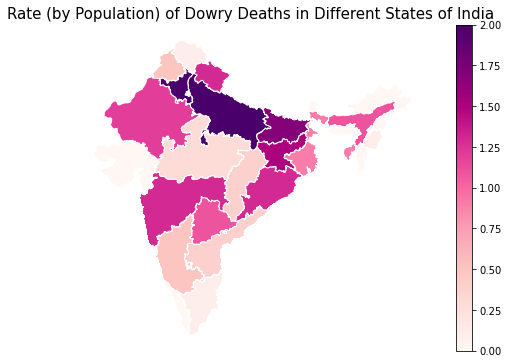

In [317]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Rate (by Population) of Dowry Deaths in Different States of India', fontdict={'fontsize': '15', 'fontweight' : '3'})


merged.plot(column='R_d',
            cmap ='RdPu',
            linewidth=0.9,
            ax=ax,
            edgecolor='1',
            legend=True, missing_kwds={
            "color": "lightgrey",
            "label": "Missing values",},)



